# フィラデルフィア半導体株指数 日足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'SOX'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-20 00:00:00-04:00,4718.229980,4798.339844,4682.490234,4788.180176,0,0.0,0.0
2024-03-21 00:00:00-04:00,4949.149902,4983.459961,4890.479980,4897.879883,0,0.0,0.0
2024-03-22 00:00:00-04:00,4876.009766,4945.640137,4868.950195,4908.259766,0,0.0,0.0
2024-03-25 00:00:00-04:00,4838.310059,4937.350098,4836.439941,4891.490234,0,0.0,0.0
2024-03-26 00:00:00-04:00,4920.209961,4943.250000,4849.810059,4851.879883,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,4485.830078,4548.540039,4413.680176,4453.240234,0,0.0,0.0
2025-03-14 00:00:00-04:00,4542.709961,4608.689941,4534.709961,4598.790039,0,0.0,0.0
2025-03-17 00:00:00-04:00,4587.109863,4703.770020,4587.049805,4663.970215,0,0.0,0.0


In [3]:
df0 = ticker.history(period='3y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21 00:00:00-04:00,3413.659912,3450.459961,3365.250000,3423.239990,0,0.0,0.0
2022-03-22 00:00:00-04:00,3421.939941,3485.229980,3417.110107,3445.850098,0,0.0,0.0
2022-03-23 00:00:00-04:00,3411.679932,3457.250000,3359.379883,3360.320068,0,0.0,0.0
2022-03-24 00:00:00-04:00,3398.010010,3533.580078,3384.300049,3532.719971,0,0.0,0.0
2022-03-25 00:00:00-04:00,3525.959961,3535.409912,3466.989990,3525.340088,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,4485.830078,4548.540039,4413.680176,4453.240234,0,0.0,0.0
2025-03-14 00:00:00-04:00,4542.709961,4608.689941,4534.709961,4598.790039,0,0.0,0.0
2025-03-17 00:00:00-04:00,4587.109863,4703.770020,4587.049805,4663.970215,0,0.0,0.0


## Moving Median

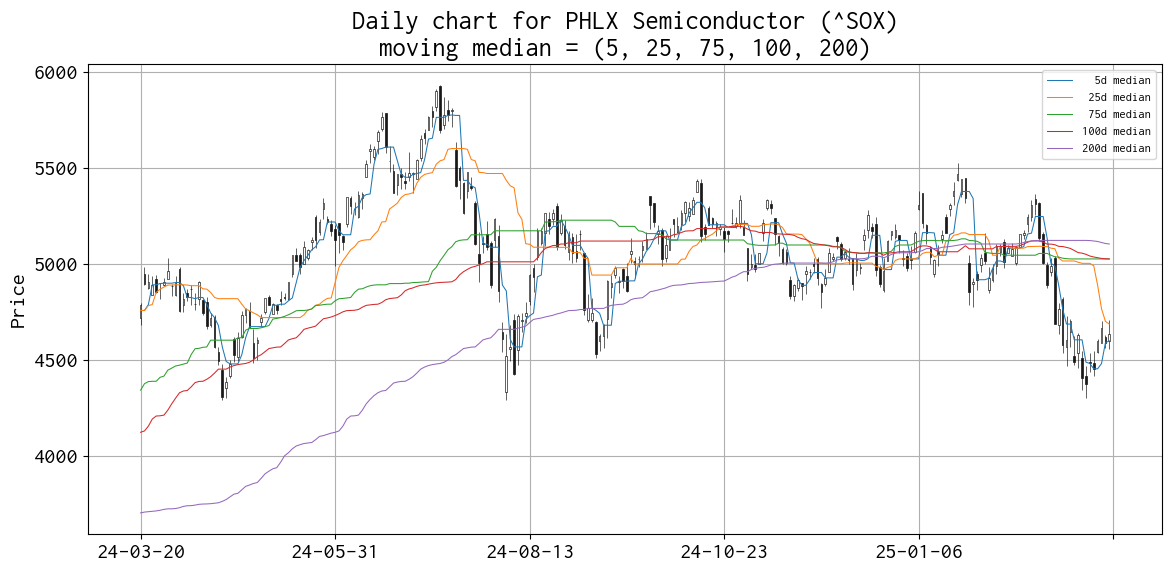

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))
"""
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()
"""

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Daily chart for %s (%s)\nmoving median = (5, 25, 75, 100, 200)' %(ticker.info['longName'], symbol))
ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-18 00:00:00-04:00,4618.040039,4628.649902,4562.040039,4589.029785,0,0.0,0.0
2025-03-19 00:00:00-04:00,4598.919922,4709.381348,4558.591797,4634.532227,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-18 00:00:00-04:00    4589.029785
2025-03-19 00:00:00-04:00    4634.532227
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-18 00:00:00-04:00          NaN
2025-03-19 00:00:00-04:00    45.502441
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-19 00:00:00-04:00    35.612305
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-03-13 00:00:00-04:00    4487.850098
2025-03-14 00:00:00-04:00    4487.850098
2025-03-17 00:00:00-04:00    4487.850098
2025-03-18 00:00:00-04:00    4487.850098
2025-03-19 00:00:00-04:00    4589.029785
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-03-13 00:00:00-04:00    4604.509766
2025-03-14 00:00:00-04:00    4598.790039
2025-03-17 00:00:00-04:00    4598.790039
2025-03-18 00:00:00-04:00    4589.029785
2025-03-19 00:00:00-04:00    4589.029785
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-03-13 00:00:00-04:00    4997.179932
2025-03-14 00:00:00-04:00    4939.849854
2025-03-17 00:00:00-04:00    4827.814941
2025-03-18 00:00:00-04:00    4733.770020
2025-03-19 00:00:00-04:00    4693.770020
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-03-13 00:00:00-04:00    5034.000000
2025-03-14 00:00:00-04:00    5028.519775
2025-03-17 00:00:00-04:00    5024.004883
2025-03-18 00:00:00-04:00    5020.770020
2025-03-19 00:00:00-04:00    5020.770020
Name: Close, dtype: float64

## Robust Bollinger's bands

In [13]:
period = 20
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2022-03-21 00:00:00-04:00,3413.659912,3450.459961,3365.250000,3423.239990,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-22 00:00:00-04:00,3421.939941,3485.229980,3417.110107,3445.850098,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-23 00:00:00-04:00,3411.679932,3457.250000,3359.379883,3360.320068,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-24 00:00:00-04:00,3398.010010,3533.580078,3384.300049,3532.719971,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2022-03-25 00:00:00-04:00,3525.959961,3535.409912,3466.989990,3525.340088,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,4485.830078,4548.540039,4413.680176,4453.240234,0,0.0,0.0,4827.814941,4597.224854,5141.539917,3780.752258,5958.012512
2025-03-14 00:00:00-04:00,4542.709961,4608.689941,4534.709961,4598.790039,0,0.0,0.0,4733.770020,4553.490112,5141.539917,3671.415405,6023.614624
2025-03-17 00:00:00-04:00,4587.109863,4703.770020,4587.049805,4663.970215,0,0.0,0.0,4693.770020,4553.490112,5036.802490,3828.521545,5761.771057


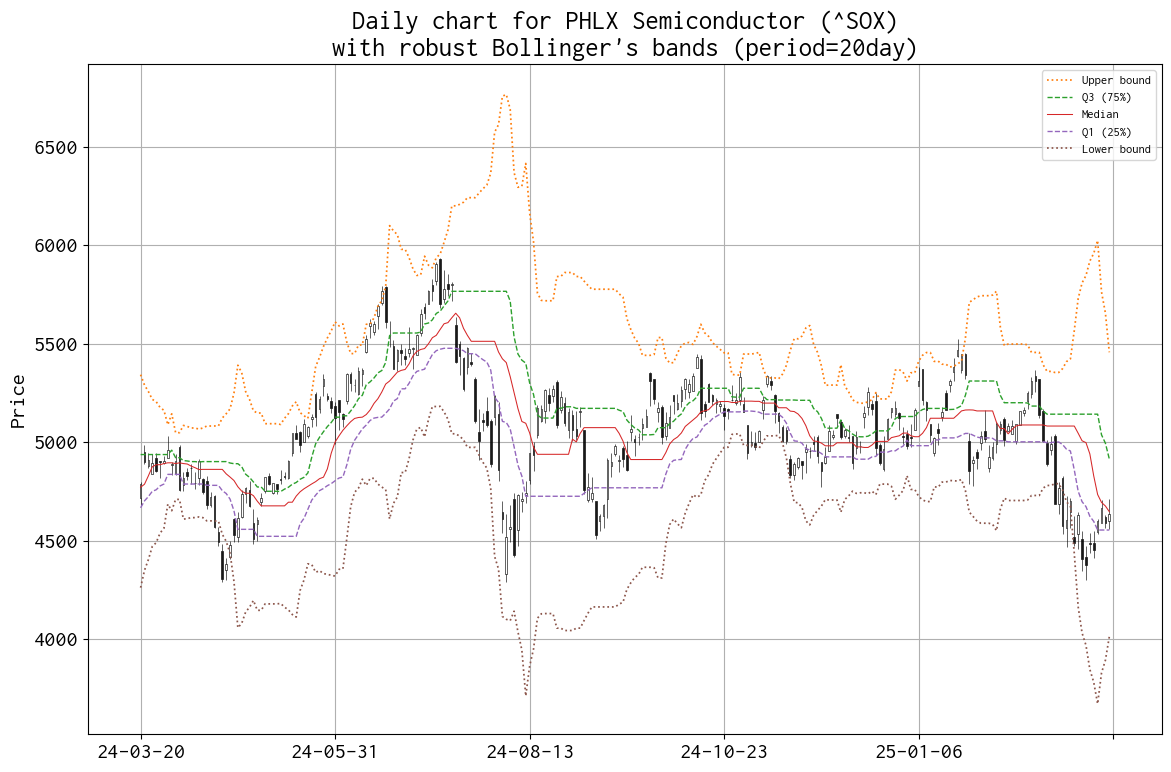

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dday)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger\'s bands (period=%dday)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

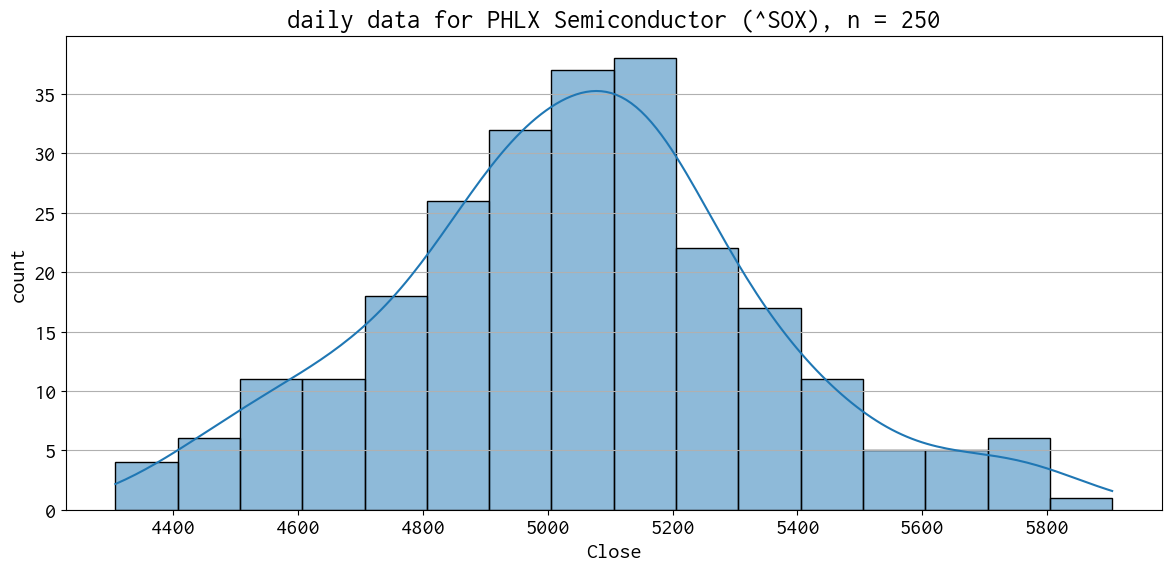

In [15]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_daily_histogram_%s.png' % code)
plt.show()